In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [4]:
dataset = pd.read_csv('Breast_cancer_data.csv')
dataset

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
#display the first few rows of the dataset
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
#display the first few colums of the dataset
dataset.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [7]:
#Sanity check of data 
dataset.shape

(569, 6)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
#displaye the missing values count 
print("missing values count:")
print(dataset.isnull().sum())

missing values count:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [10]:
dataset.shape[0]

569

In [11]:
#chek the duplicates value
print("check the duplicate vales")
print(dataset.duplicated().sum())

check the duplicate vales
0


In [12]:
#Identify the garbage value
for i in dataset.select_dtypes(include='object').columns:
    print(dataset[i].value_counts())
    print("****"*10)
    

In [13]:
#this fun describe mumerical data
dataset.describe() # mean count SD

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [14]:
# this description for numerical value
dataset.describe().T# row convert col

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


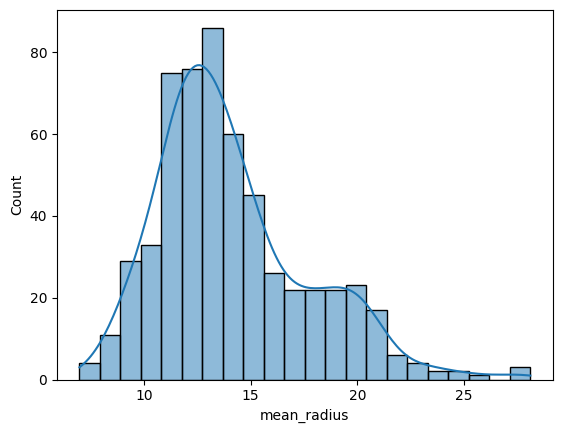

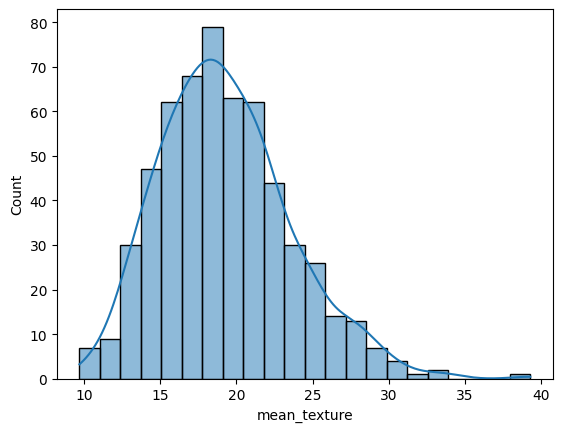

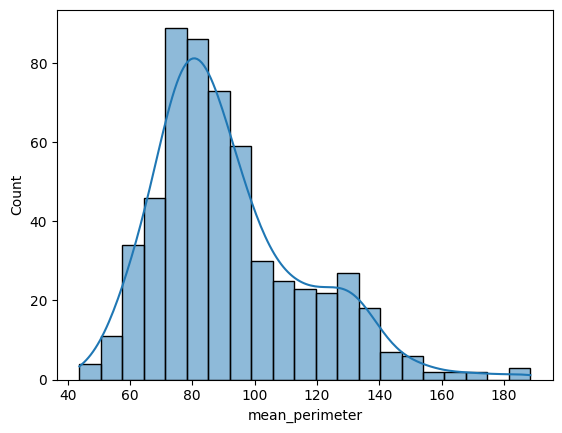

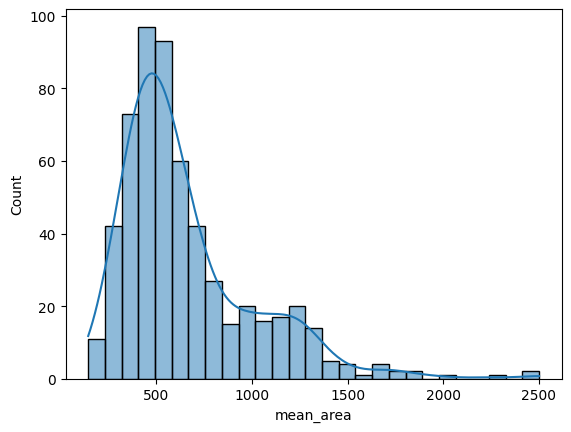

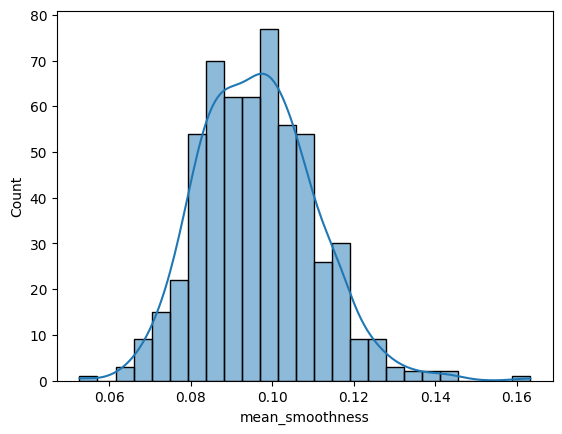

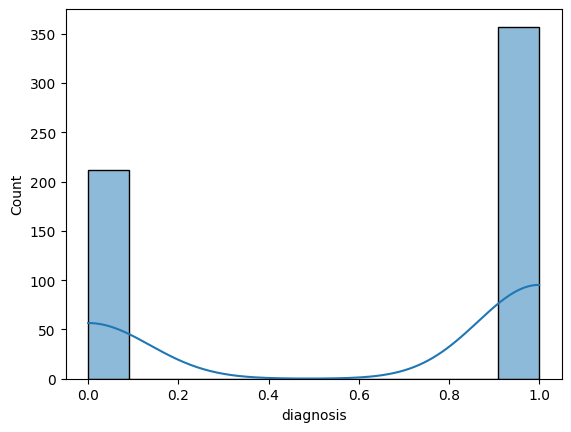

In [15]:
# check data distribution numerical(EDA)
import warnings
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.histplot(data=dataset,x=i,kde=True)
    plt.show()


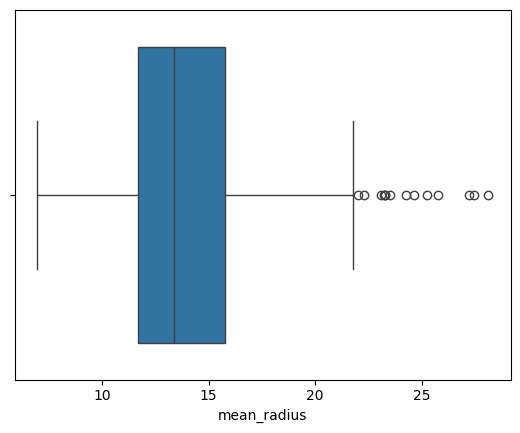

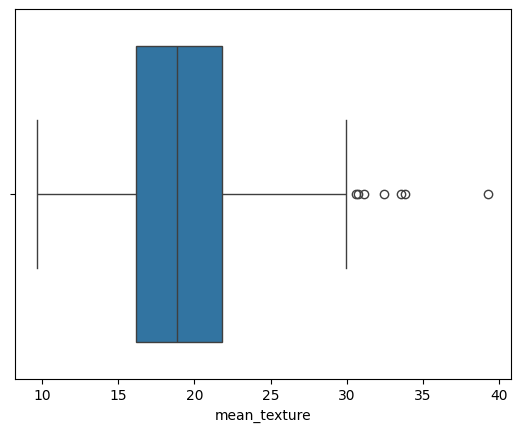

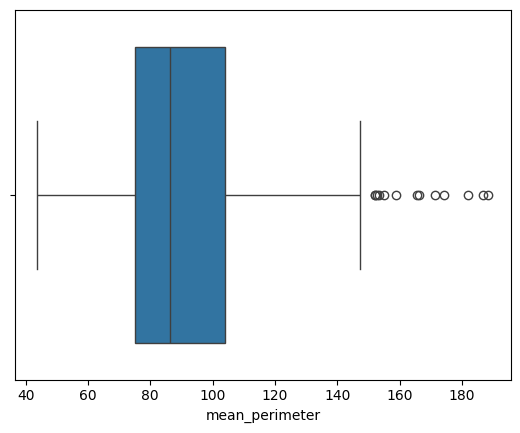

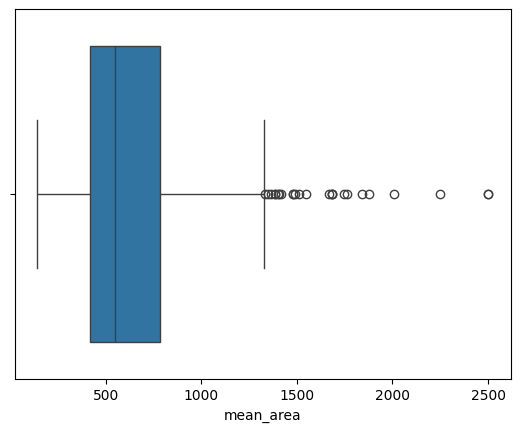

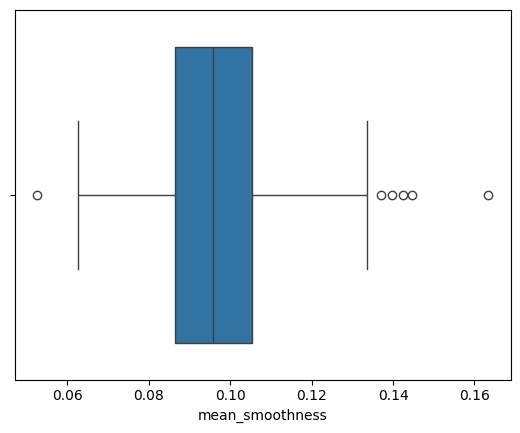

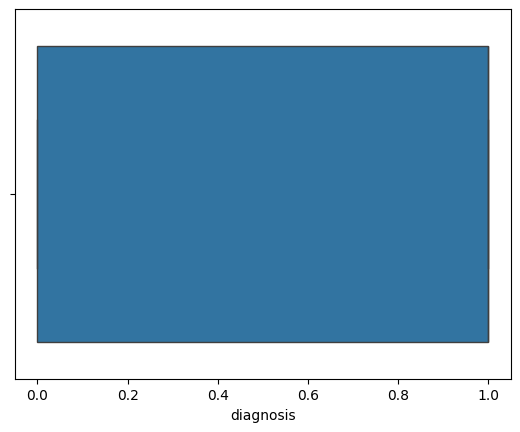

In [16]:
# Identifyer the outlier(numerical value)data visulization
import warnings
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset,x=i)
    plt.show()


In [17]:
# Relation between target vectors and feture metrix.(numerical value-target vector)

dataset.select_dtypes(include="number").columns


Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [18]:
#first method
for i in['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis']:
    plt.show()

In [19]:
#sec method 
dataset.select_dtypes(include="number").corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [20]:
# Remove Outlier intercortlize range method
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [21]:
wisker(dataset['mean_radius'])

(5.579999999999999, 21.9)

In [22]:
for i in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis']:# Outlier remove 
    lw,uw=wisker(dataset[i])
    dataset[i]=np.where(dataset[i]<lw,lw,dataset[i])
    dataset[i]=np.where(dataset[i]>uw,uw,dataset[i])


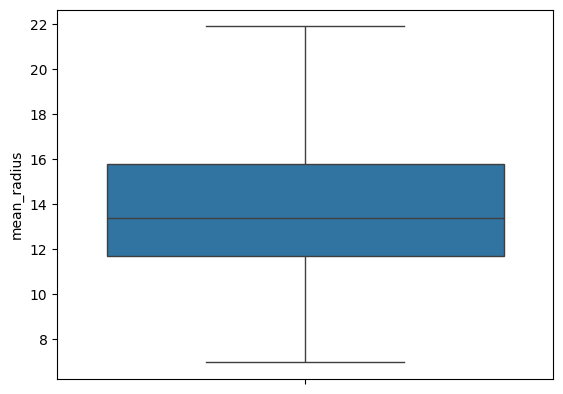

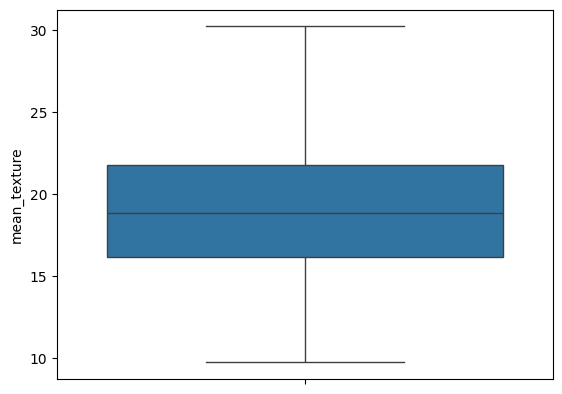

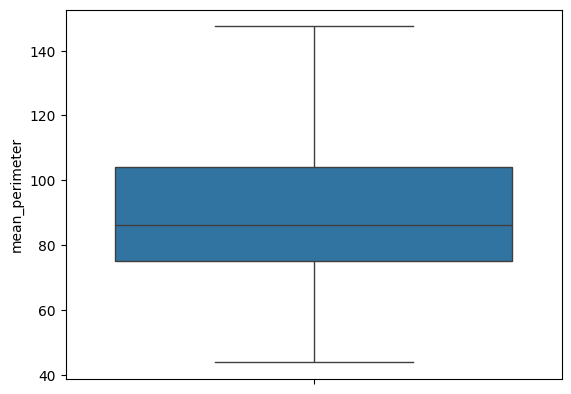

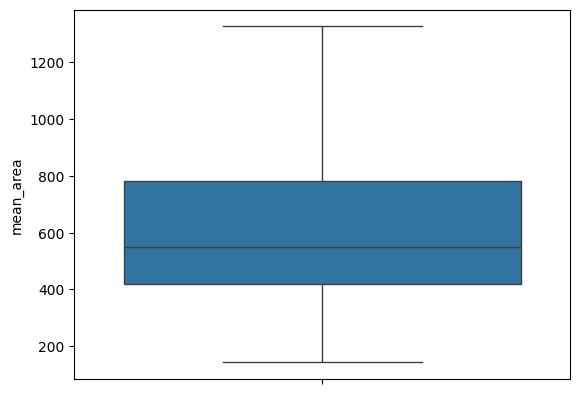

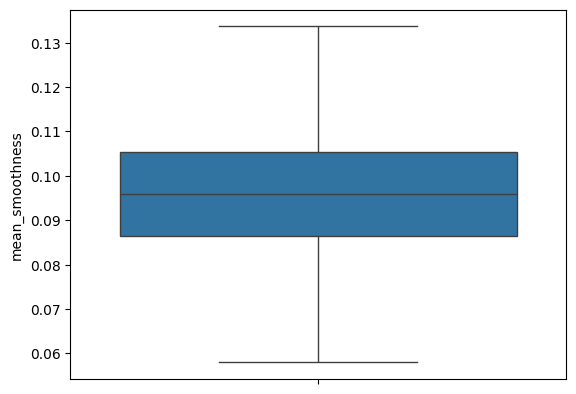

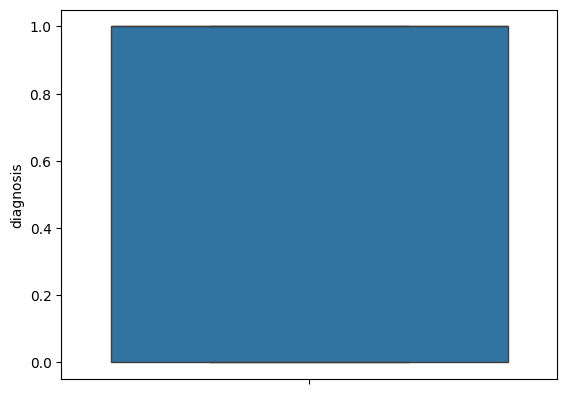

In [23]:
for i in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis']:
    sns.boxplot(dataset[i])
    plt.show()

In [24]:
# duplicate value remove
dataset.drop_duplicates()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.118400,0.0
1,20.57,17.77,132.90,1326.0,0.084740,0.0
2,19.69,21.25,130.00,1203.0,0.109600,0.0
3,11.42,20.38,77.58,386.1,0.133695,0.0
4,20.29,14.34,135.10,1297.0,0.100300,0.0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.0
565,20.13,28.25,131.20,1261.0,0.097800,0.0
566,16.60,28.08,108.30,858.1,0.084550,0.0
567,20.60,29.33,140.10,1265.0,0.117800,0.0


In [25]:
#covert feature matrix and target vector
dataset['diagnosis'].value_counts()

diagnosis
1.0    357
0.0    212
Name: count, dtype: int64

In [26]:
dataset.groupby('diagnosis').mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0.0,17.290047,21.530259,114.224033,937.784434,0.102776
1.0,12.146524,17.903445,78.075406,462.790196,0.092400


In [27]:
X = dataset.drop(columns='diagnosis', axis=1)
y = dataset['diagnosis']

In [28]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.118400
1,20.57,17.77,132.90,1326.0,0.084740
2,19.69,21.25,130.00,1203.0,0.109600
3,11.42,20.38,77.58,386.1,0.133695
4,20.29,14.34,135.10,1297.0,0.100300
...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000
565,20.13,28.25,131.20,1261.0,0.097800
566,16.60,28.08,108.30,858.1,0.084550
567,20.60,29.33,140.10,1265.0,0.117800


In [29]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: diagnosis, Length: 569, dtype: float64

In [30]:
# splitting the data into training data & testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X.shape,X_train.shape,X_test.shape

((569, 5), (455, 5), (114, 5))

In [32]:
#Model Training
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
#training logistic regression model using training data

model.fit(X_train,y_train)

LogisticRegression()

In [34]:
#Model Evaluation
#Accuracy Score
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)

In [35]:
print("Accuracy on training data=" ,training_data_accuracy)

Accuracy on training data= 0.9142857142857143


In [36]:
#accuracy on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [37]:
print("Accuracy on test data=" ,test_data_accuracy)


Accuracy on test data= 0.8947368421052632


In [38]:
pd.DataFrame (confusion_matrix(y_test,X_test_prediction),columns=list(range(0,2)))

,0,1
0,38,7
1,5,64


In [39]:
from sklearn.metrics import recall_score,precision_score
print("For Logistic Model")
print("-"*50)
cf=pd.DataFrame (confusion_matrix(y_test,X_test_prediction),columns=list(range(0,2)))
print(cf)
print("-"*50)
print("Train data set Accuracy Score:",accuracy_score(y_test,X_test_prediction))
print("Test data set f1_score:",f1_score(y_test,X_test_prediction))
print("Test data set recall Score:",recall_score(y_test,X_test_prediction))
print("Test data set precision Score:",precision_score(y_test,X_test_prediction))

For Logistic Model
--------------------------------------------------
    0   1
0  38   7
1   5  64
--------------------------------------------------
Train data set Accuracy Score: 0.8947368421052632
Test data set f1_score: 0.9142857142857143
Test data set recall Score: 0.927536231884058
Test data set precision Score: 0.9014084507042254


In [40]:
#Building a Predictive System
input_data = (13.54,14.36,87.46,566.3,0.0977)
#Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Breast cancer is Malignant')#canser
else:
    print('The Breast Cancer is Benign')#not cancer


[1.]
The Breast Cancer is Benign


In [41]:
import pickle
filename = "savedmodel.sav"
pickle.dump(model,open(filename,"wb"))


In [42]:
load_model = pickle.load(open(filename,'rb'))

In [43]:
load_model.predict([[13.54,14.36,87.46,566.3,0.0977]])

array([1.])